In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import datetime

In [2]:
data = pd.read_csv('005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-09,26760.0,26880.0,26420.0,26880.0,271.287384,9283050.0
1,2015-11-10,26720.0,26820.0,26280.0,26420.0,266.644897,9877550.0
2,2015-11-11,26420.0,26900.0,26420.0,26660.0,269.067017,7022450.0
3,2015-11-12,26660.0,26680.0,26340.0,26340.0,265.837433,7870850.0
4,2015-11-13,26340.0,26340.0,26000.0,26000.0,262.406006,8883850.0


In [3]:
dataset = data.dropna()
#csv파일의 결측치 제거

In [4]:
high_prices = dataset['High'].values
low_prices = dataset['Low'].values
mid_prices = (high_prices + low_prices) / 2
#평균값 계산

In [11]:
seq_len = 50  #윈도우 크기
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [12]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1053, 50, 1), (117, 50, 1), (1053,), (117,))

In [19]:
model = keras.Sequential()

model.add(keras.layers.GRU(50, return_sequences=True, input_shape=(50, 1)))

model.add(keras.layers.GRU(64, return_sequences=False))

model.add(keras.layers.Dense(1, activation='relu'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 50, 50)            7950      
_________________________________________________________________
gru_7 (GRU)                  (None, 64)                22272     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 30,287
Trainable params: 30,287
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train,
    validation_data=(x_test,y_test),
    batch_size = 10,
    epochs = 10)

Epoch 1/10
106/106 [==============================] - 4s 33ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 2/10
106/106 [==============================] - 3s 28ms/step - loss: 0.0035 - val_loss: 8.8203e-04
Epoch 3/10
106/106 [==============================] - 3s 28ms/step - loss: 0.0034 - val_loss: 7.7247e-04
Epoch 4/10
106/106 [==============================] - 3s 30ms/step - loss: 0.0034 - val_loss: 7.1993e-04
Epoch 5/10
106/106 [==============================] - 3s 29ms/step - loss: 0.0034 - val_loss: 8.6742e-04
Epoch 6/10
106/106 [==============================] - 3s 30ms/step - loss: 0.0033 - val_loss: 6.8121e-04
Epoch 7/10
106/106 [==============================] - 4s 35ms/step - loss: 0.0033 - val_loss: 6.8472e-04
Epoch 8/10
106/106 [==============================] - 3s 29ms/step - loss: 0.0033 - val_loss: 7.8806e-04
Epoch 9/10
106/106 [==============================] - 3s 28ms/step - loss: 0.0034 - val_loss: 6.8023e-04
Epoch 10/10
106/106 [==============================] - 3s 2

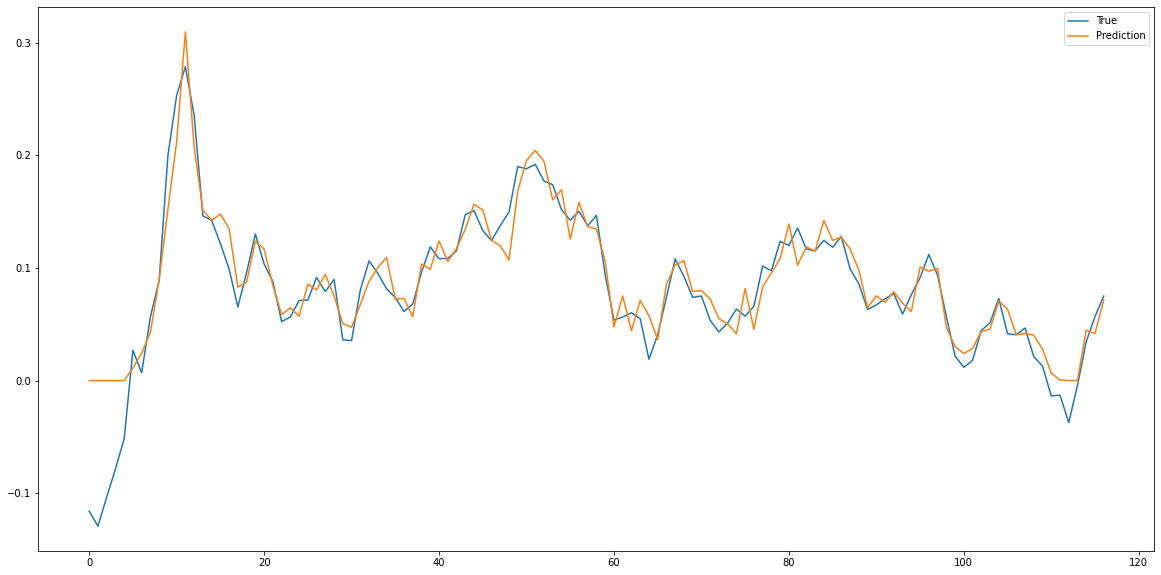

In [21]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()